In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import random
from scipy.integrate import odeint


Dynamics of a simple system of equations
$$x' = x - y$$
$$y' = x**2 - 4$$
    

In [10]:
def X_prime(X,*args): #Exact
    x1 = X[0] - X[1]
    x2 = X[0]**2 - 4
    
    return (x1,x2)

def Jacobean(X):
    J =np.array([[1,-1],
                 [2*X[0], 0]])
    return J
    

What are the null clines?
$$0 = x - y$$ 
$$0 = x^2 - 4$$
So we have null clines at $$y=x ;x = \pm 2$$

Giving us two fixed points: (-2,2), and (2,2).
To determine stability, we can look at the Jacobean at each point

In [12]:
for P in [ (2,2), (-2,-2)]:
    J = Jacobean(P)
    e1, e2 = np.linalg.eig(J)[0]
    
    if e1 < 0 and e2 < 0:
        print('The fixed point at {} is a sink'.format(P))
    elif e1 < 0 or e2 < 0:
        print('The fixed point at {} is a saddle'.format(P))
    elif e1 > 0 and e2 > 0:
        print('The fixed point at {} is a source'.format(P))
    

The fixed point at (2, 2) is a source
The fixed point at (-2, -2) is a saddle


Finally, we can plot some vectors around these fixed points

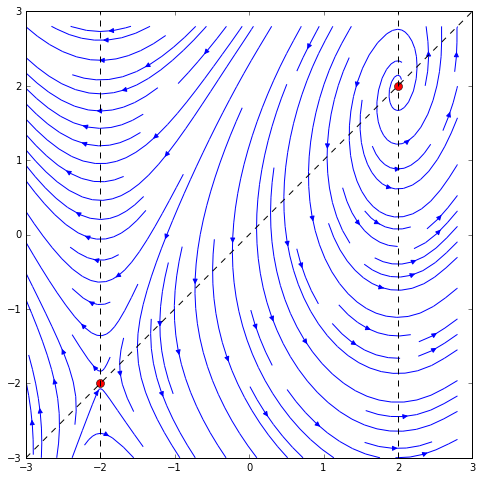

In [7]:
x,y = np.meshgrid(np.arange(-3,3,0.2), np.arange(-3,3,0.2))
U = x-y
V = x**2-4
plt.figure(figsize=(8,8))
plt.streamplot(x,y,U,V)
#And the fixed points
plt.plot([-2,2], [-2,2], 'ro', markersize=8)
#And some nullclines, why not
plt.plot([-3,3], [-3,3], 'k--') #y = x
plt.plot([-2,-2], [-3,3], 'k--') #x = -1
plt.plot([2,2], [-3,3], 'k--') #x = 0
